In [224]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from scikitplot.metrics import plot_roc
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_selection import SelectKBest

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.tree._tree import TREE_LEAF
from sklearn import tree

## Preparation

In [225]:
df_train=pd.read_csv("ravdess_features_train.csv")
df_test=pd.read_csv("ravdess_features_test.csv")

df_train["emotion"]=df_train["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_train["emotional_intensity"]=df_train["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_train["sex"]=df_train["sex"].replace(["M", "F"],[0,1])
df_train["statement"]=df_train["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_train["vocal_channel"]=df_train["vocal_channel"].replace(["speech", "song"],[0,1])
X_train=df_train.drop(columns=["sex"]).values
y_train=df_train.sex.values

df_test["emotion"]=df_test["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_test["emotional_intensity"]=df_test["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_test["sex"]=df_test["sex"].replace(["M", "F"],[0,1])
df_test["statement"]=df_test["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_test["vocal_channel"]=df_test["vocal_channel"].replace(["speech", "song"],[0,1])
X_test=df_test.drop(columns=["sex"]).values
y_test=df_test.sex.values

In [226]:
df_train.drop(axis="index", labels=[35,243,451,554,563,658,659,1031,1075,1283], inplace=True)
X_train=df_train.drop(columns=["sex"]).values
y_train=df_train.sex.values

df_test.drop(axis="index", labels=[33,34,138,196,197,198,199], inplace=True)
X_test=df_test.drop(columns=["sex"]).values
y_test=df_test.sex.values

In [227]:
len(X_train[0]), len(X_test[0])

(376, 376)

In [228]:
np.unique(df_train.sex, return_counts=True)

(array([0, 1], dtype=int64), array([929, 889], dtype=int64))

In [229]:
Tot=100*929/96
x=4*Tot/100
Tot,x

(967.7083333333334, 38.708333333333336)

In [230]:
rows2remove=np.random.choice(df_train[df_train["sex"] == 1].index, 889-39, replace = False)

In [231]:
rows2remove

array([ 151,  771,  531,  372, 1200,  990,  545, 1412, 1000, 1146, 1441,
       1439, 1591,  326, 1186, 1572,  121,  749,  595, 1424,  412,  951,
        993, 1211,  405, 1604, 1391, 1597, 1008, 1577, 1214,  589, 1218,
        410,  744,  124, 1395,  572, 1585, 1399,  413, 1598,  375, 1773,
       1366, 1204,  197,  536,  762, 1178,  947, 1189, 1448, 1168,  178,
       1196,  127,  565,  580,  802,  950, 1187, 1821,  338, 1011,  976,
        527,  561,  399, 1387,  129,  384, 1593, 1365,  203,  183, 1247,
        581,  573,  366,  526,  969,  941,  336, 1390,  117,  740, 1663,
        728,  618, 1388,  329, 1375,  126,  791,  378, 1213,  736,  773,
       1797,  521,  978, 1810, 1455,  313, 1649,  754,  540,  827, 1650,
       1768,  579, 1171,  996,  347, 1396, 1165, 1622,  592, 1422, 1359,
       1400, 1803, 1645,  115, 1160, 1655,  576,  986, 1241, 1619, 1220,
       1809, 1575, 1156,  792, 1208, 1637, 1639, 1370,  747, 1152,  974,
       1035, 1243,  578, 1783,  193,  570,  828, 16

In [232]:
df2 = df_train.drop(index=rows2remove, axis=0)
X_train = df2.drop(columns=["sex"]).values
y_train = df2.sex.values
len(X_train), len(y_train)

(968, 968)

In [233]:
sel = SelectKBest(k=108)
X_train = sel.fit_transform(X_train, y_train)
X_test = sel.transform(X_test)
len(X_train), len(y_train)

(968, 968)

In [234]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([929,  39], dtype=int64))

## Classification

In [235]:
clf = DummyClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.5024311183144247
F1-score [0.66882416 0.        ]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       310
           1       0.00      0.00      0.00       307

    accuracy                           0.50       617
   macro avg       0.25      0.50      0.33       617
weighted avg       0.25      0.50      0.34       617



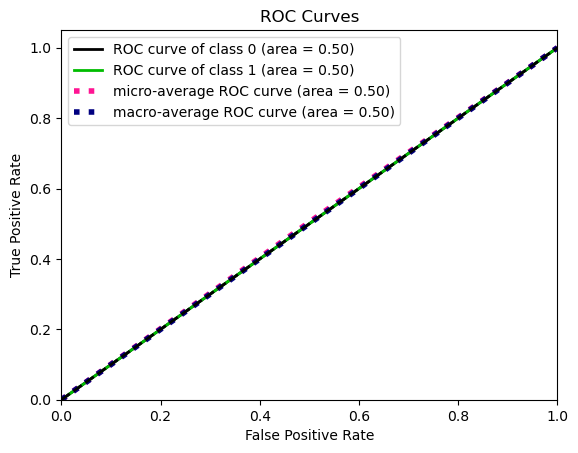

In [236]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.legend()
plt.show()

In [237]:
y_score

array([[0.95971074, 0.04028926],
       [0.95971074, 0.04028926],
       [0.95971074, 0.04028926],
       ...,
       [0.95971074, 0.04028926],
       [0.95971074, 0.04028926],
       [0.95971074, 0.04028926]])

In [238]:
len(X_train[0]), len(X_test[0])

(108, 108)

In [239]:
clf = DecisionTreeClassifier(min_samples_leaf=3)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.8606158833063209
F1-score [0.87714286 0.83895131]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       310
           1       0.99      0.73      0.84       307

    accuracy                           0.86       617
   macro avg       0.89      0.86      0.86       617
weighted avg       0.89      0.86      0.86       617



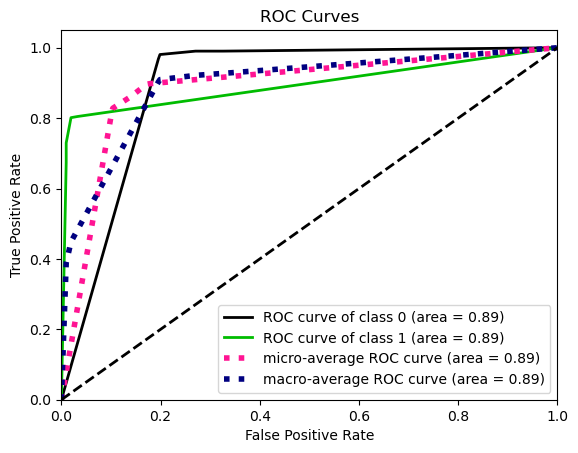

In [240]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

In [241]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.9)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7990275526742301
F1-score [0.83243243 0.74898785]
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       310
           1       0.99      0.60      0.75       307

    accuracy                           0.80       617
   macro avg       0.85      0.80      0.79       617
weighted avg       0.85      0.80      0.79       617



## PCA

In [242]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

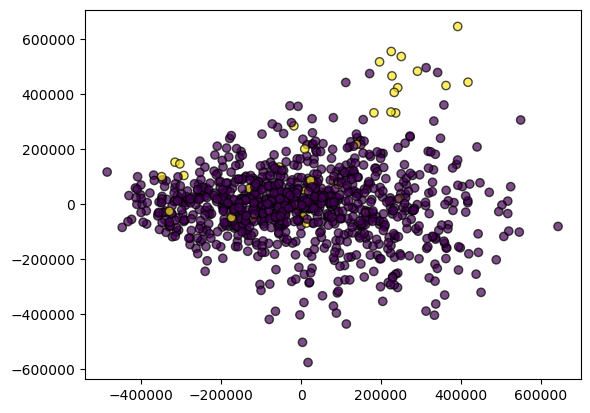

In [243]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='k', alpha=0.7)
plt.show()

## Undersampling

### Random Undersampler

In [398]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 39, 1: 39})


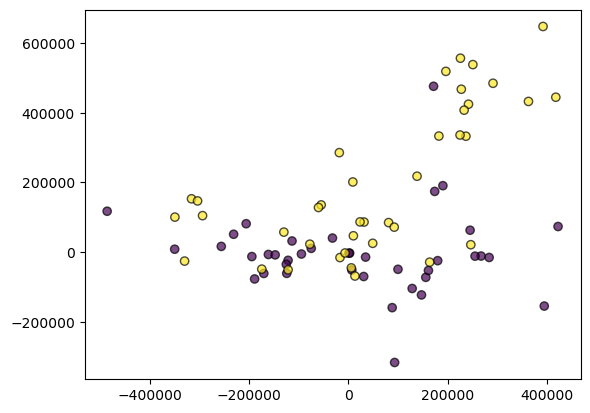

In [245]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, edgecolor='k', alpha=0.7)
plt.show()

In [246]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7649918962722853
F1-score [0.75382003 0.7751938 ]
              precision    recall  f1-score   support

           0       0.80      0.72      0.75       310
           1       0.74      0.81      0.78       307

    accuracy                           0.76       617
   macro avg       0.77      0.77      0.76       617
weighted avg       0.77      0.76      0.76       617



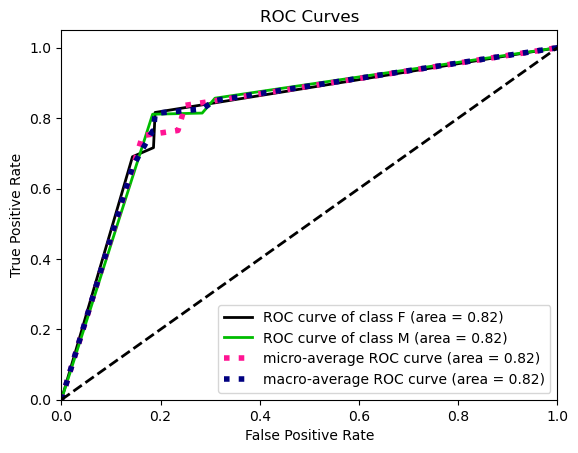

In [247]:
y_score = clf.predict_proba(X_test)
plot_roc(np.where(y_test==0, "F", "M"), y_score)
plt.show()

### Condensed nearest neighbor

In [248]:
import warnings
warnings.simplefilter("ignore")

In [318]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=-1)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 115, 1: 39})


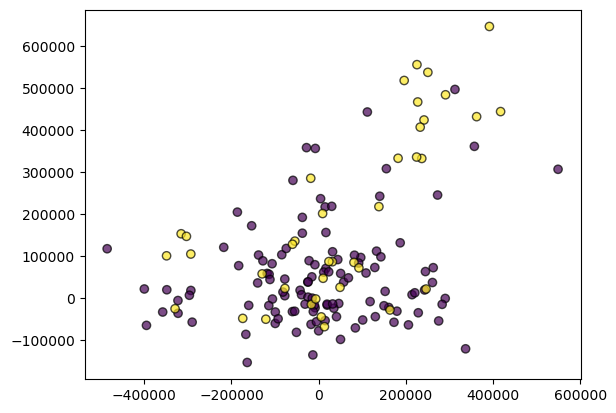

In [250]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, edgecolor='k', alpha=0.7)
plt.show()

In [319]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7990275526742301
F1-score [0.8       0.7980456]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       310
           1       0.80      0.80      0.80       307

    accuracy                           0.80       617
   macro avg       0.80      0.80      0.80       617
weighted avg       0.80      0.80      0.80       617



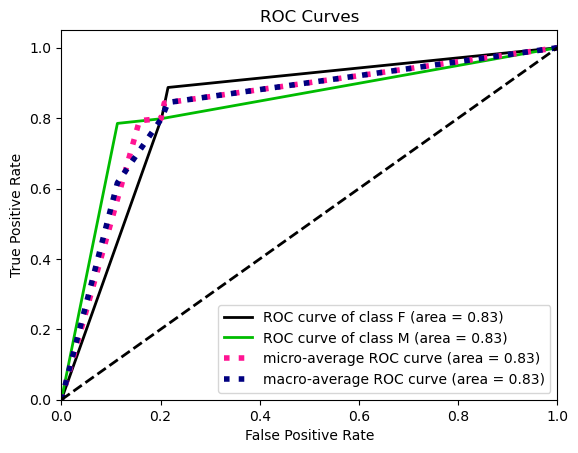

In [320]:
y_score = clf.predict_proba(X_test)
plt
plot_roc(np.where(y_test==0, "F", "M"), y_score)
plt.show()

## Tomek Links

In [399]:
tl = TomekLinks(sampling_strategy="auto")
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 917, 1: 39})


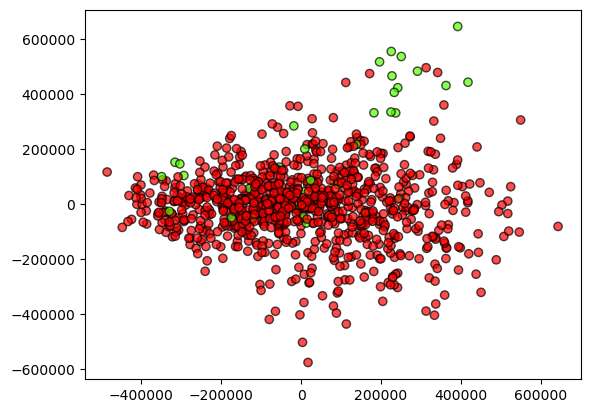

In [400]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [402]:
accuracy_tomek, f1_tomek = [], []
for i in range(1,15):
    tom = TomekLinks(sampling_strategy="auto", n_jobs=-1)
    X_res, y_res = tom.fit_resample(X_train, y_train)
    clf = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_tomek.append(accuracy.mean())
    f1_tomek.append(f1.mean())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [403]:
np.argmax(accuracy_tomek), max(accuracy_tomek)

(1, 0.9701908813263526)

In [404]:
np.argmax(f1_tomek), max(f1_tomek)

(1, 0.9685708424172623)

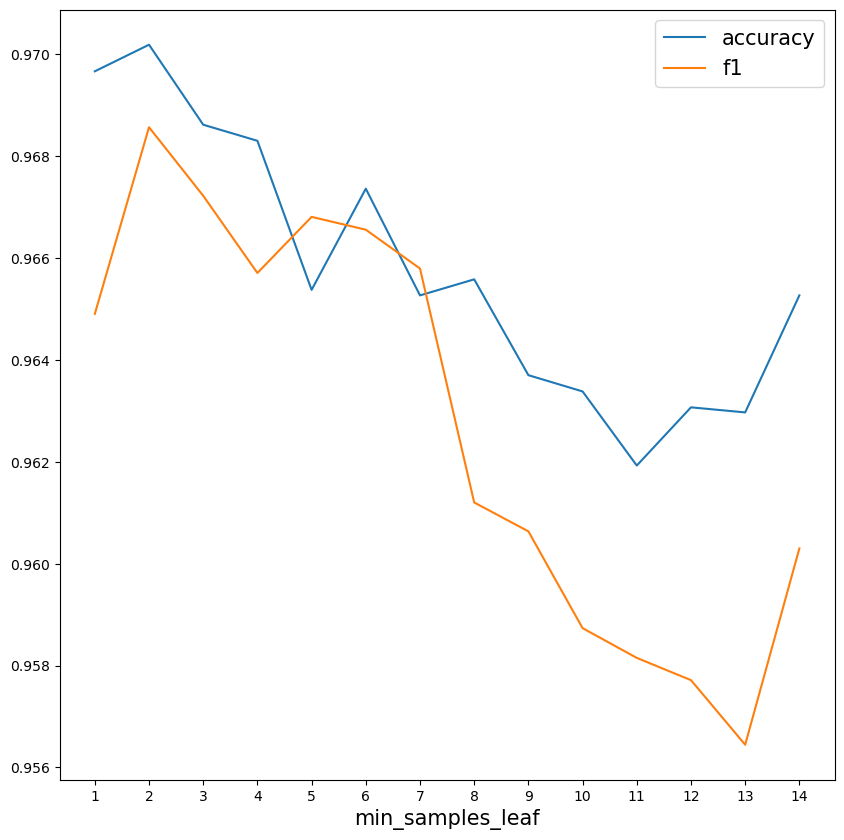

In [405]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1, len(accuracy_tomek)+1), accuracy_tomek, label="accuracy")
plt.plot(np.arange(1, len(f1_tomek)+1), f1_tomek, label="f1")
plt.legend(fontsize=15)
plt.xlabel("min_samples_leaf", fontsize=15)
plt.xticks(np.arange(1,len(f1_tomek)+1))
plt.show()

Miglior è min_samples_leaf=2

In [406]:
tl = TomekLinks(sampling_strategy="auto")
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 917, 1: 39})


In [407]:
clf = DecisionTreeClassifier(min_samples_leaf=2, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8103727714748784
F1-score [0.84081633 0.76553106]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       310
           1       0.99      0.62      0.77       307

    accuracy                           0.81       617
   macro avg       0.86      0.81      0.80       617
weighted avg       0.86      0.81      0.80       617



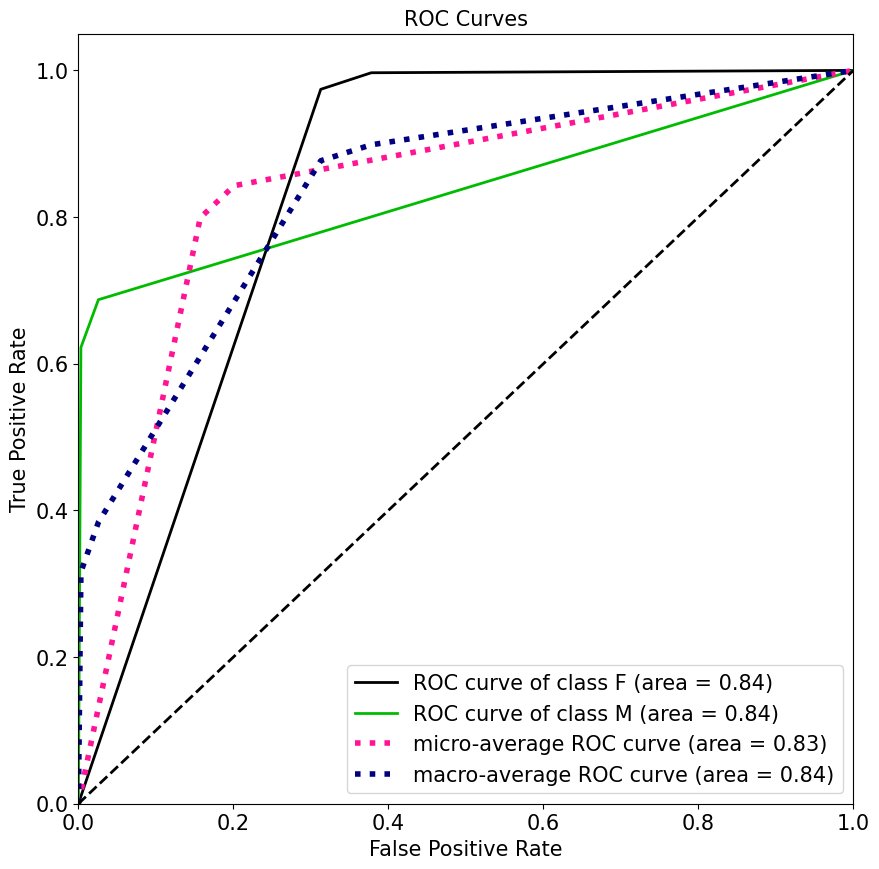

In [408]:
y_score = clf.predict_proba(X_test)
plot_roc(np.where(y_test==0, "F", "M"), y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.show()

## Edited Nearest Neighbor

In [257]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 871, 1: 39})


In [258]:

accuracy_all, f1_all = [], []
for i in range(1,15):
    enn = EditedNearestNeighbours(n_neighbors=i, kind_sel="all", n_jobs=-1)
    X_res, y_res = enn.fit_resample(X_train, y_train)
    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_all.append(accuracy.mean())
    f1_all.append(f1.mean())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [259]:
np.argmax(accuracy_all), accuracy_all[np.argmax(accuracy_all)]

(10, 0.9688494623655914)

In [260]:
np.argmax(f1_all), f1_all[np.argmax(f1_all)]

(7, 0.9691863591722444)

Best nearest_neighbors=7/10

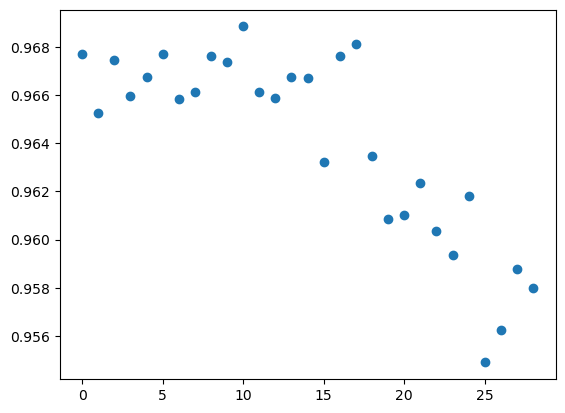

In [261]:
plt.scatter(np.arange(len(accuracy_all)), accuracy_all) 
plt.show()

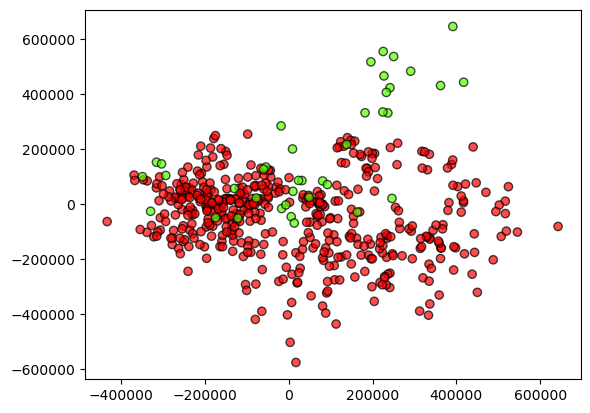

In [262]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [263]:
enn = EditedNearestNeighbours(n_neighbors=7, kind_sel="all")
X_res, y_res = enn.fit_resample(X_train, y_train)
accuracy_tree, f1_tree = [], []
for i in range(1,20):
    clf = DecisionTreeClassifier(min_samples_leaf=i, class_weight=None, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_tree.append(accuracy.mean())
    f1_tree.append(f1.mean())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [264]:
np.argmax(accuracy_tree), accuracy_tree[np.argmax(accuracy_tree)]

(1, 0.9716666666666666)

In [265]:
np.argmax(f1_tree), f1_tree[np.argmax(f1_tree)]

(1, 0.9671275605150887)

In [267]:
enn = EditedNearestNeighbours(n_neighbors=10, kind_sel="all")
X_res, y_res = enn.fit_resample(X_train, y_train)
accuracy_tree, f1_tree = [], []
for i in range(1,16):
    clf = DecisionTreeClassifier(min_samples_leaf=i, class_weight=None, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_tree.append(accuracy.mean())
    f1_tree.append(f1.mean())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [268]:
np.argmax(accuracy_tree), accuracy_tree[np.argmax(accuracy_tree)]

(1, 0.9710779650084658)

In [269]:
np.argmax(f1_tree), f1_tree[np.argmax(f1_tree)]

(3, 0.9693421427361878)

Miglior numero di min_sample_leaf è 2 con fissati neighbors 7

In [270]:
plt.scatter(np.arange(len(accuracy_tree)), accuracy_tree)
plt.scatter(np.arange(len(f1_tree)), f1_tree) 
plt.show()

In [271]:
enn = EditedNearestNeighbours(n_neighbors=7)
X_res, y_res = enn.fit_resample(X_train, y_train)
clf = DecisionTreeClassifier(min_samples_leaf=2, class_weight=None, random_state=None)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.826580226904376
F1-score [0.84908322 0.79619048]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       310
           1       0.96      0.68      0.80       307

    accuracy                           0.83       617
   macro avg       0.86      0.83      0.82       617
weighted avg       0.86      0.83      0.82       617



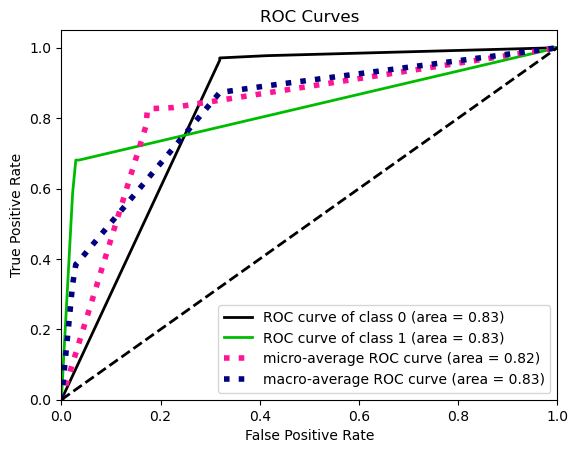

In [272]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

## Cluster centroids

In [273]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 39, 1: 39})


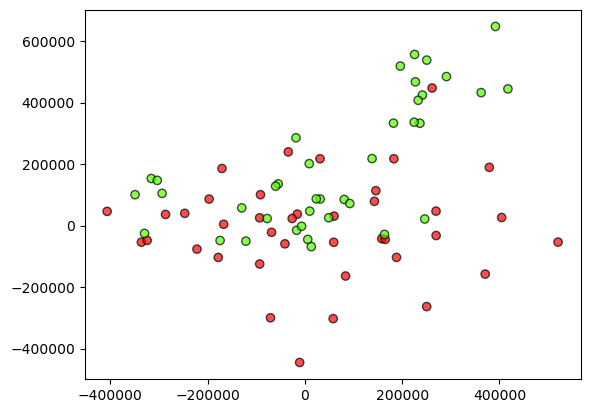

In [274]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [275]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7439222042139384
F1-score [0.67219917 0.78989362]
              precision    recall  f1-score   support

           0       0.94      0.52      0.67       310
           1       0.67      0.97      0.79       307

    accuracy                           0.74       617
   macro avg       0.80      0.75      0.73       617
weighted avg       0.81      0.74      0.73       617



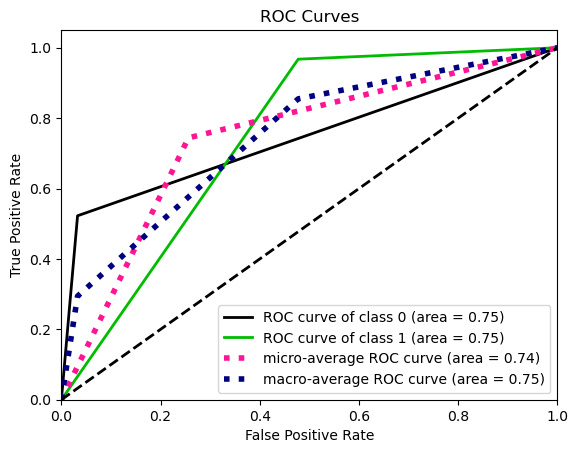

In [276]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# Oversampling

## Random oversampler

In [277]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 929, 1: 929})


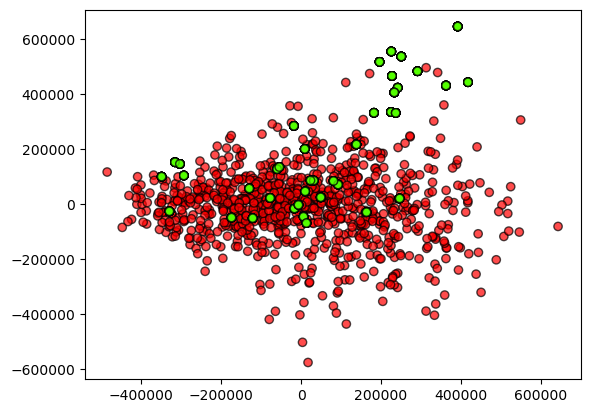

In [278]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [279]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8476499189627229
F1-score [0.86609687 0.82330827]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       310
           1       0.97      0.71      0.82       307

    accuracy                           0.85       617
   macro avg       0.87      0.85      0.84       617
weighted avg       0.87      0.85      0.84       617



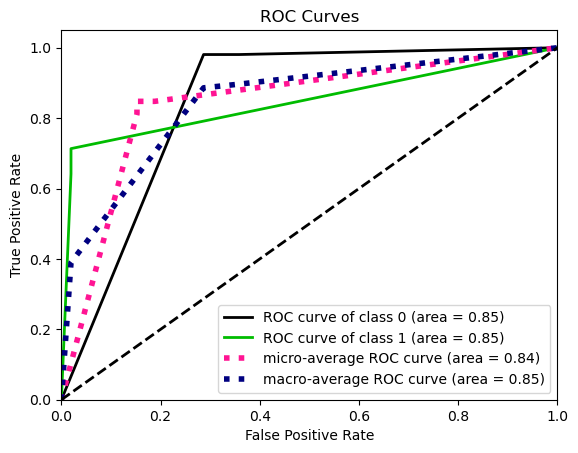

In [280]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

## Smote

In [281]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 929, 1: 929})


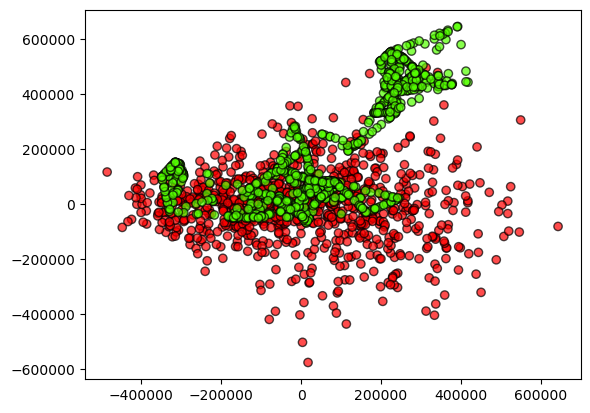

In [282]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [283]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8687196110210696
F1-score [0.88243832 0.85137615]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       310
           1       0.97      0.76      0.85       307

    accuracy                           0.87       617
   macro avg       0.89      0.87      0.87       617
weighted avg       0.89      0.87      0.87       617



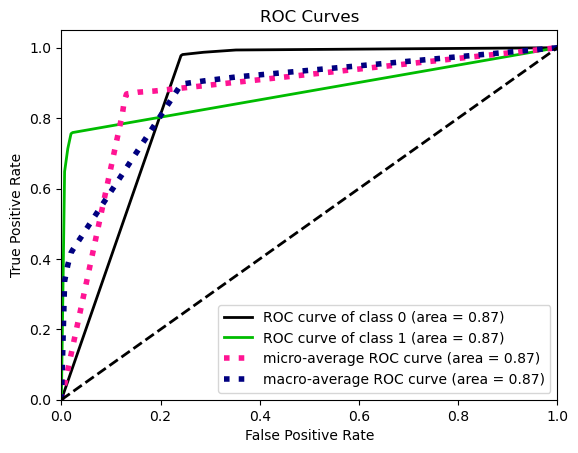

In [284]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

## ADASYN

In [339]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 931, 0: 929})


In [342]:
accuracy_ada, f1_ada = [], []
for i in range(1,21):
    ada = ADASYN(n_neighbors=i, n_jobs=-1)
    X_res, y_res = ada.fit_resample(X_train, y_train)
    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_ada.append(accuracy.mean())
    f1_ada.append(f1.mean())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [343]:
np.argmax(accuracy_ada), max(accuracy_ada)

(1, 0.9864516129032259)

In [344]:
np.argmax(f1_ada), max(f1_ada)

(1, 0.9877944525792267)

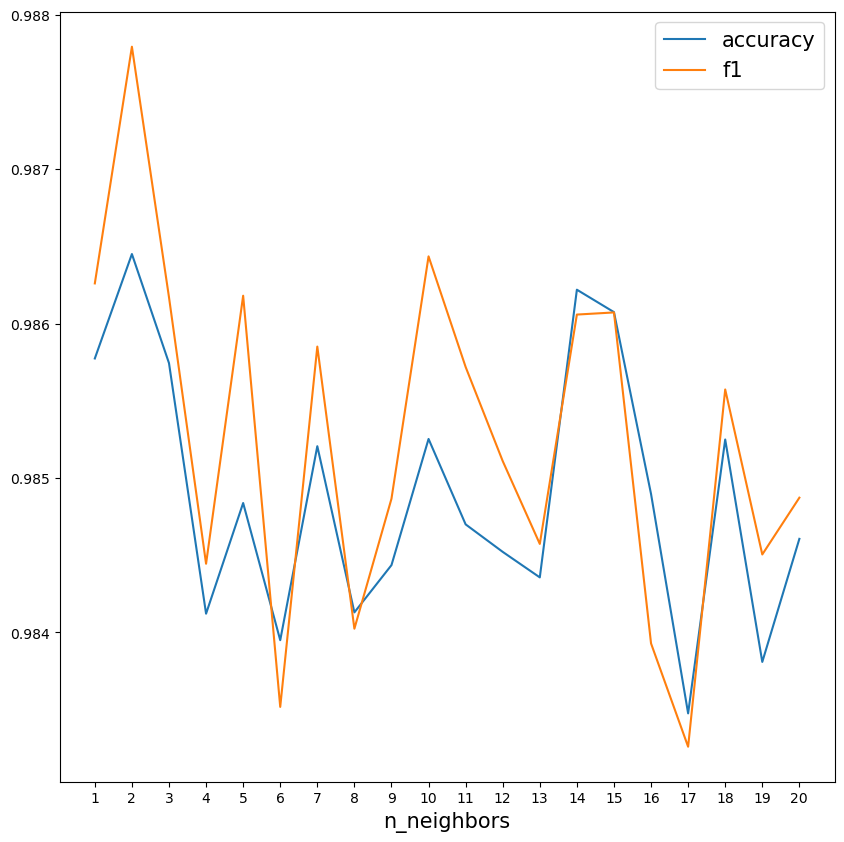

In [366]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,len(accuracy_ada)+1), accuracy_ada, label="accuracy")
plt.plot(np.arange(1,len(f1_ada)+1), f1_ada, label="f1")
plt.legend(fontsize=15)
plt.xlabel("n_neighbors", fontsize=15)
plt.xticks(np.arange(1,len(f1_ada)+1))
plt.show()

Miglior nearest_neighbor=2

In [371]:
ada = ADASYN(random_state=None, n_neighbors=2)
X_res, y_res = ada.fit_resample(X_train, y_train)
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8768233387358185
F1-score [0.88823529 0.86281588]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       310
           1       0.97      0.78      0.86       307

    accuracy                           0.88       617
   macro avg       0.89      0.88      0.88       617
weighted avg       0.89      0.88      0.88       617



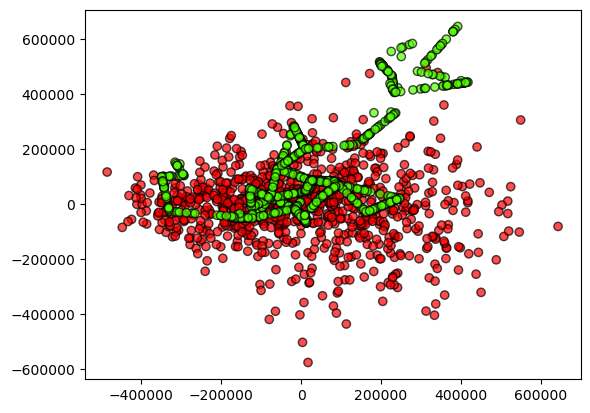

In [372]:
ca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [373]:

ada = ADASYN(n_neighbors=2)
X_res, y_res = ada.fit_resample(X_train, y_train)
accuracy_tree, f1_tree = [], []
for i in range(1,8):
    clf = DecisionTreeClassifier(min_samples_leaf=i, class_weight=None, random_state=42)
    clf.fit(X_res, y_res)
    rskf = RepeatedStratifiedKFold()
    accuracy = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="accuracy")
    f1 = cross_val_score(clf,X_res,y_res,cv=rskf,scoring="f1_weighted")

    accuracy_tree.append(accuracy.mean())
    f1_tree.append(f1.mean())
    print(i)


1
2
3
4
5
6
7


In [374]:
np.argmax(accuracy_tree), accuracy_tree[np.argmax(accuracy_tree)]

(0, 0.9891935483870966)

In [375]:
np.argmax(f1_tree), f1_tree[np.argmax(f1_tree)]

(0, 0.9899454643999814)

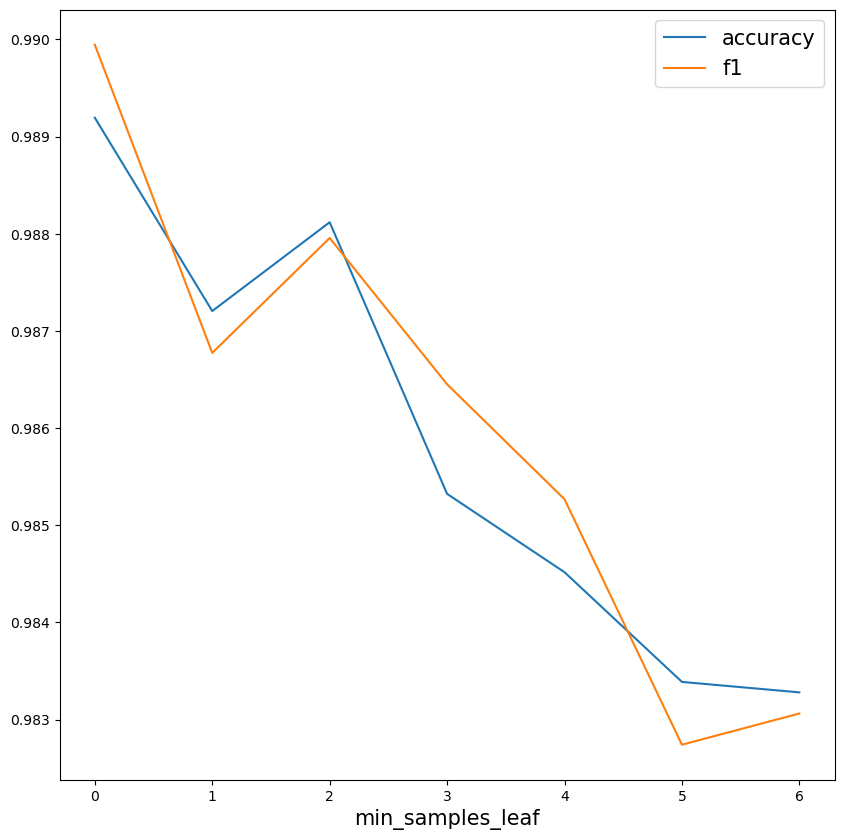

In [376]:
plt.figure(figsize=(10,10))
plt.plot(accuracy_tree, label="accuracy") 
plt.plot(f1_tree, label="f1") 
plt.legend(fontsize=15)
plt.xlabel("min_samples_leaf", fontsize=15)
plt.show()

Migliore min_sample_leaf=1 per n_neighbors=2

In [396]:
ada = ADASYN(random_state=None, n_neighbors=2)
X_res, y_res = ada.fit_resample(X_train, y_train)
clf = DecisionTreeClassifier(min_samples_leaf=1, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7747163695299838
F1-score [0.81241565 0.71805274]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       310
           1       0.95      0.58      0.72       307

    accuracy                           0.77       617
   macro avg       0.82      0.77      0.77       617
weighted avg       0.82      0.77      0.77       617



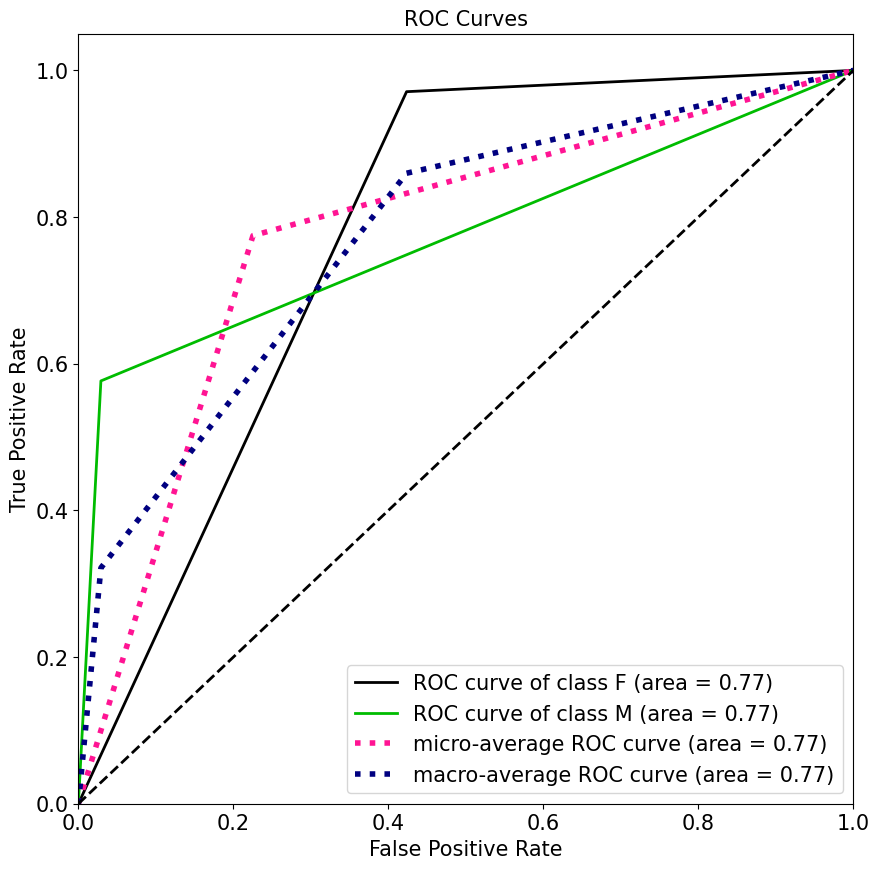

In [397]:
y_score = clf.predict_proba(X_test)
plot_roc(np.where(y_test==0, "F", "M"), y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.show()

# Class weight

In [297]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([929,  39], dtype=int64))

In [298]:
929/39

23.82051282051282

In [299]:
fs = [int(x) for x in np.linspace(2,10,num=9)]
fs

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [300]:
'''
param_grid = {
    "min_samples_leaf": [int(x) for x in np.linspace(1,20,num=20)],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [int(x) for x in np.linspace(2,10,num=9)],
    "max_features": ["sqrt", "log2", None]
}
grid = GridSearchCV(
    DecisionTreeClassifier(class_weight={0:1, 1:24}),
    param_grid=param_grid,
    scoring="accuracy",
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1
)
grid.fit(X_train, y_train)
clf = grid.best_params_
'''

'\nparam_grid = {\n    "min_samples_leaf": [int(x) for x in np.linspace(1,20,num=20)],\n    "criterion": ["gini", "entropy"],\n    "min_samples_split": [int(x) for x in np.linspace(2,10,num=9)],\n    "max_features": ["sqrt", "log2", None]\n}\ngrid = GridSearchCV(\n    DecisionTreeClassifier(class_weight={0:1, 1:24}),\n    param_grid=param_grid,\n    scoring="accuracy",\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1\n)\ngrid.fit(X_train, y_train)\nclf = grid.best_params_\n'

In [301]:
#grid.best_params_

Best params are min_samples_leaf=1, min_samples_split=5, max_features=sqrt, criterion="entropy"

In [302]:
clf = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=5, max_features="sqrt", criterion="entropy",
                             class_weight={0:1, 1:24}, random_state=None)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.839546191247974
F1-score [0.85997171 0.81214421]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       310
           1       0.97      0.70      0.81       307

    accuracy                           0.84       617
   macro avg       0.87      0.84      0.84       617
weighted avg       0.87      0.84      0.84       617



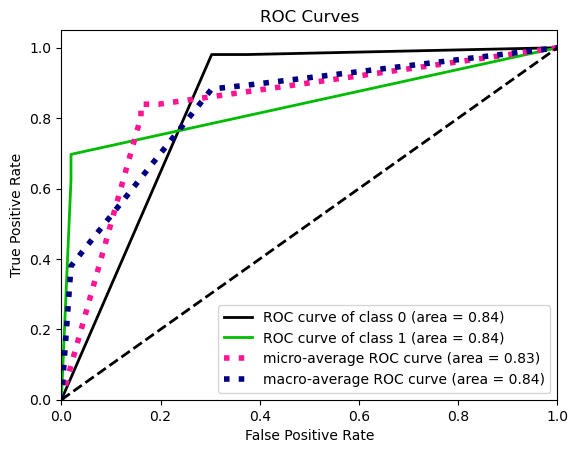

In [303]:
y_score = clf.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

## Corrected decision tree

In [304]:
def is_leaf(inner_tree, index):
    # Check whether node is leaf node
    return (inner_tree.children_left[index] == TREE_LEAF and
            inner_tree.children_right[index] == TREE_LEAF)


def prune_index(inner_tree, decisions, index=0):
    # Start pruning from the bottom - if we start from the top, we might miss
    # nodes that become leaves during pruning.
    # Do not use this directly - use prune_duplicate_leaves instead.
    if not is_leaf(inner_tree, inner_tree.children_left[index]):
        prune_index(inner_tree, decisions, inner_tree.children_left[index])
    if not is_leaf(inner_tree, inner_tree.children_right[index]):
        prune_index(inner_tree, decisions, inner_tree.children_right[index])

    # Prune children if both children are leaves now and make the same decision:
    if (is_leaf(inner_tree, inner_tree.children_left[index]) and
        is_leaf(inner_tree, inner_tree.children_right[index]) and
        (decisions[index] == decisions[inner_tree.children_left[index]]) and
        (decisions[index] == decisions[inner_tree.children_right[index]])):
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        # print("Pruned {}".format(index))


def prune_duplicate_leaves(dt):
    # Remove leaves if both
    decisions = dt.tree_.value.argmax(axis=2).flatten().tolist()  # Decision for each node
    prune_index(dt.tree_, decisions)

In [305]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

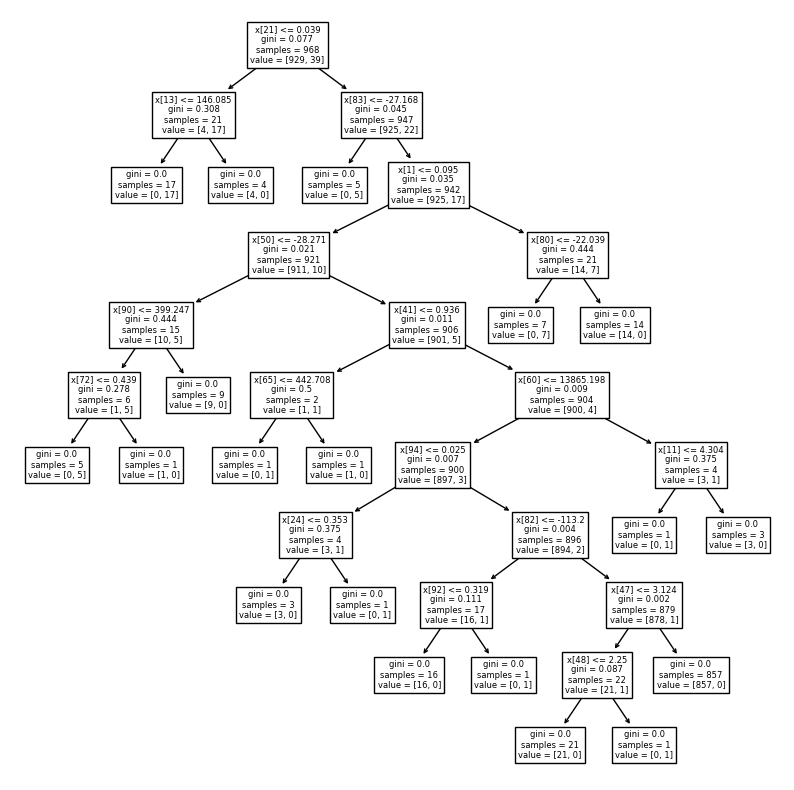

In [306]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()

In [307]:
prune_duplicate_leaves(clf)

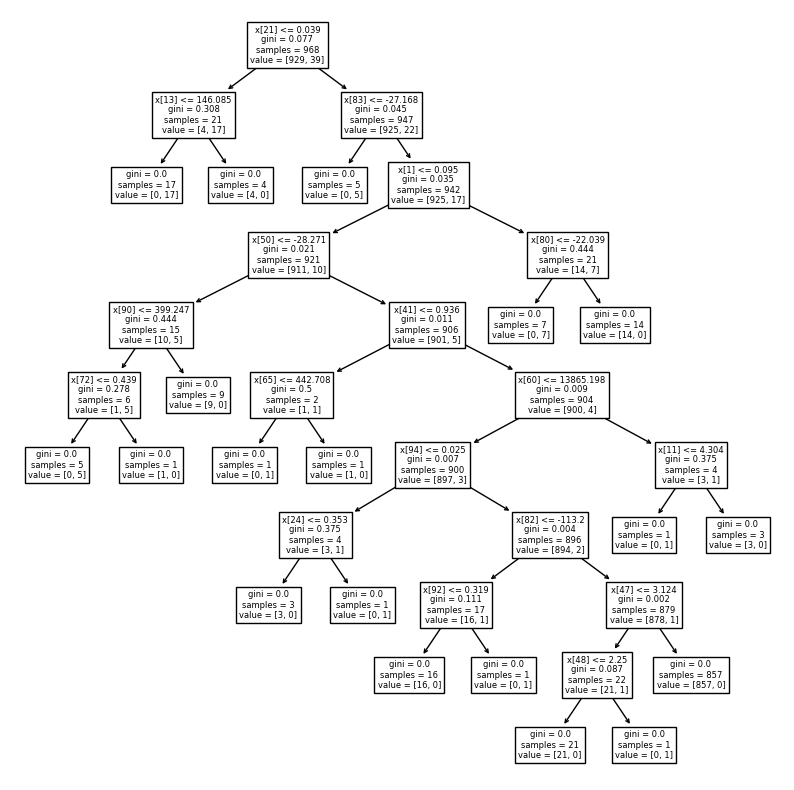

In [308]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()